In [101]:
import numpy as np
import pandas as pd
import os ## to access directories
from PIL import Image ## to read Images
import matplotlib.pyplot as plt

In [2]:
ds = "./SignLanguageDigitsDatase/"

In [3]:
np.set_printoptions(threshold = np.inf)

Backpropagation in CNN layer: https://www.youtube.com/watch?app=desktop&v=z9hJzduHToc

In [59]:
commonepoch=np.empty((0,), dtype=int)
commonloss=np.empty((0,), dtype=int)

In [84]:
def createDS(name):
    folder = "SignLanguageDigitsDatase/"
    lblist = []
    imglist = []
    for i in range(0,10):
        lb = np.zeros(10)
        lb[i]=1
        for image in os.listdir(folder+name+"/A"+str(i)):
            img = Image.open(folder+name+"/A"+str(i)+"/"+image).convert('RGB').resize((100,100))
            np_img= np.array(img)
            print(np_img.shape)
            np_img = np_img/255.0 ## Normalizing the images to be between 0 and 255
            lblist.append(lb)
            imglist.append(np_img)
    return np.array(imglist), np.array(lblist)

In [85]:
train_x,train_y=createDS("train")
indices = np.arange(len(train_x))
np.random.shuffle(indices)
print(indices)
train_x = train_x[indices]
train_y = train_y[indices]
print(train_y)
test_x, test_y=createDS("test")

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [86]:

valid_x, valid_y=createDS("valid")

indices = np.arange(len(valid_x))
np.random.shuffle(indices)
print(indices)
valid_x = valid_x[indices]
valid_y = valid_y[indices]
print(valid_y)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

## Multilayer Perceptron From Scratch

### CNN - Convolutional Neural Network

#### Buliding First Layer -- Input layer

Input layer --> where we pass in the image (64,64,3)

In [7]:
def input_layer(img1dSet):
    img3dset = np.zeros_like(img1dSet)
    for i in range(len(img1dSet)):
        img3dset[i]= img1dSet[i].reshape((100,100,3))
    return img3dset

In [87]:
train_x = input_layer(train_x)
test_x = input_layer(test_x)
valid_x = input_layer(valid_x)

#### Buliding Second layer -- Convolution layer

Convolution layer -- applies filter to the image

In [9]:
# The filter learns and extracts features from the image. can be of 3*3 or 5*5 size
# The stride determines how much the filter moves at a time, which affects the resolution and size of the output.
# The padding ensures that the spatial size of the image can be maintained or controlled, preventing the image from shrinking too much as we move deeper into the network.


## striding --> resolution of the image --> 1
## padding --> size of the output image

# output size= (Inp size+2*padding- filter size)/stride +1

# for 64*64 size image the padding

# 64 = (64+2*pad - 3)/1 +1
# 66 = 64 + 2*pad
# 2 = 2* pad
# pad = 1


## Going to define the convolutional layer with 'n' filter each as a class


class ConvLayer:
    def __init__(self, n_filters, filter_size, inp_depth, stride = 1, padding = 1):
        self.fcnt = n_filters
        self.fsize = filter_size
        self.fdepth = inp_depth
        self.stride = stride
        self.padding = padding
        self.filters = np.random.randn(n_filters, filter_size, filter_size, inp_depth)*0.1
    ##created n no. of filters randomly which will form a convolution layer

    
    def conv(self, img3d): 
        self.input = img3d
        # print("original image")
        # plt.imshow(img3d) #for grayscale
        # plt.axis('off')
        # plt.show()
        h,w,d = img3d.shape
        # we will iterate the convolution function over our image the "output_image size" no. of times. 
        # the size of output depends on a folrmula
        # output size= (Inp size+2*padding- filter size)/stride +1

        out_h = (h+ 2*self.padding - self.fsize)//self.stride +1
        out_w = (w+ 2*self.padding - self.fsize)//self.stride +1
        ##Gist of what will this convolution function do\
        ## --> Slides the filter across the input image
        ## --> During each slides.. accumulates the dot product( single value) of filter and inpImg and stores in Output image
        img3d = np.pad(img3d,((self.padding, self.padding),(self.padding,self.padding),(0,0)),mode = 'constant', constant_values=0)
        out_img = np.zeros((h,w,self.fcnt)) ## in tradition it is h,w,fcnt.. preferred for later std library algorithms
        ## this output_img will be an 1d output of all filters' featuremaps
        for k in range(self.fcnt): ## for each filter
            f= self.filters[k]
            for i in range(out_h):
                for j in range(out_w):
                    ## For each iteration we must identify starting and ending indices in our input Image
                    start_h = i*self.stride
                    end_h = i+self.fsize
                    start_w = j*self.stride
                    end_w = j+ self.fsize
    
                    region = img3d[start_h:end_h, start_w:end_w,:]
                    out_img[i,j,k] = np.sum(region * f)
        
        ## this output_img will be an 1d output of all filters' featuremaps
        return out_img ## a 3d image [no. of filter,h,w] ## fcnt is no more--> np.sum(would have summed all indices value and output one value per i,j for a filter

    def activate(self, img3d):
        ## Apply the convolution then apply ReLU Activation function
        self.input=img3d ## stored for backward propagation
        imgconv = self.conv(self.input)
        relu_img = np.maximum(0,imgconv)
        self.relu = relu_img
        return relu_img  

    ## for backward propagation the filter needs to be updated again
    ## Where to apply backward propagation -- key is to optimize all the randomly initiated things 
    ## here filters
    def backProp(self,dz, learning_rate = 0.01):
        ## dz should also be a 3d image of size [no. of filter, h,w]
        h,w,fcnt = dz.shape
        dw= np.zeros_like(self.filters) ## creating gradient for filter matrix
        for k in range(self.fcnt):
            f = self.filters[k]
            for i in range(h-self.fsize):
                for j in range (w-self.fsize):
                    region = self.input[i:i+self.fsize, j:j+self.fsize, :]
                    #print(region.shape, dz[i,j,k].shape)
                    dw[k] += region*dz[i,j,k]
        ## backward
        self.filters -= learning_rate* dw
        

## Pooling

#### Max pooling → Focuses on strongest features (e.g., strong edges or patterns).

In [10]:
class MaxPoolLayer:
    def __init__(self, pool_size=2, stride = 2):
        self.pool_size= pool_size
        self.stride = stride

    def pool(self,input):
        ## now we have image input as (64, 64, nfilters)
        ## ie nfilters number of feature maps
        ## Now we need to reduce the 64 * 64 image to 32 * 32
        ## Max pooling that is taking maximum out of each 2*2 matrices --> can retain the sharp features of the image
        ## Uses of POoling --> Reduce size and avoids overfitting for the model
        self.size= input.shape
        h,w,fcnt = input.shape

        out_h = (h - self.pool_size) // self.stride + 1
        out_w = (w - self.pool_size) // self.stride +1
        self.indmax = np.zeros((out_h,out_w,fcnt,2) , dtype= int)

        pooled_output = np.zeros((out_h,out_w, fcnt))
        #print (out_h, out_w)

        for i in range(out_h):
            for j in range(out_w):
                for k in range(fcnt):
                    start_h = i*self.stride
                    end_h = start_h + self.pool_size
                    start_w = j*self.stride
                    end_w = start_w + self.pool_size
                    region = input[start_h:end_h, start_w:end_w, k]
                    pooled_output[i,j,k] = np.max(region)
                    max_idx = np.unravel_index(np.argmax(region), region.shape) ## the argmax output will be the index of maximum in the 1d array
                    ## eg: argmax output --> 0,1,2,3, ( 1d index
                    ## Unravelled --> (0,0), (0,1), (1,0), (1,1)
                    ## Now we wanna it to be positioned inside the region;
                    self.indmax[i,j,k]= (start_h + max_idx[0], start_w+max_idx[1])  
                    ## we will pass flattened output to our fully connected layer
        #plotting each filters output
        # print ("Output of MaxPool:")
        # for i in range(fcnt):
        #     array = pooled_output[:,:,i]
        #     plt.imshow(array, cmap = 'gray') #for grayscale
        #     plt.axis('off')
        #     plt.show()
            
        pooled_output = pooled_output.reshape(-1)
        pooled_output = pooled_output.reshape(pooled_output.shape[0],1)
        
        #print (pooled_output.shape)
        return pooled_output
    ### Back Propagation in Max Pooling layer:
    ##  we need to revert back all the changes the "Max pooling layer" did to the image
    ## 1. reshape to 1 d array
    ## 2. refuce image size from 64 * 64 to 32 * 32
    ## Now the Loss will be affected only by the max value of each 2*2 matrix
    ## therefore, gradient is the whole output of only the max value. so the gradient should reside in the cell of max value.
    ## for that we need to store the index of max value in a matrix 
    def backProp(self,gradient):
        h,w,fcnt = self.size
        #print ( gradient.shape)
        gradient = gradient.reshape((h//self.pool_size, w//self.pool_size, fcnt))
        #print ( gradient.shape)
        self.dinput = np.zeros(self.size)
        for i in range(h//self.pool_size):
            for j in range(w//self.pool_size):
                for k in range(fcnt):
                    pos_max = self.indmax[i,j,k]
                    self.dinput[pos_max[0], pos_max[1], k]= gradient[i,j,k]

        #print(self.dinput.shape)
        return self.dinput ## backwarded
        
        

## Fully Connected Layer

## Output Layer Class

#### We will define weights for the link as small random numbers and ML algorithm should tweak the weight according to the error

#### Responsible to output the class to which the input image belongs

In [11]:
class fullyconnected:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size,output_size) * 0.01
        self.biases = np.zeros ((1, output_size))
    def forward(self, img):
        self.input = img ## useful for BackPropagation-- img -- pooled and flattened output initially then previous forward output 
        output = np.dot(self.input.T,self.weights)+self.biases 
        exp = np.exp(output - np.max(output))
        #self.bploss = self.softmax - labels ## loss for backpropagation
        self.softmax = exp / (np.sum(exp)+1e-15) ## softmaxed output --> output turned to probabilities
        #print("softmax:",self.softmax, "exp:" ,exp)
        #print(self.softmax.shape)
        #print(self.input.shape)
        return self.softmax
    #### Cross - Entropy loss : when the task is multi class classification cross - entropy loss can work better with the one-hot encoded labels
    def crossEntropyCalculator(self, labels):
        pred = np.argmax(self.softmax)
        actual = np.argmax(labels)
        print("Actual: " , actual, "Prediction: ", pred)
        epsilon = 1e-15
        clipped_preds = np.clip(self.softmax, epsilon, 1-epsilon)
        loss = np.sum(-labels*np.log(clipped_preds))/ labels.shape[0]
        return loss   ## for tracting the predictability variations of the model 
    ## BackPropagation
    ### Calculating Gradient and Updating weights using optimizer
    def backProp(self, labels, learning_rate = 0.01):
        dz = self.softmax - labels  ## derivation of softmax - cross entropy-- average loss calcultion for gradients
        #print(labels)
        self. dw = np.dot(self.input,dz)
        self. db = np.sum(dz,axis=0)
        self.dw = np.clip(self.dw, -1.0,1.0)
        self.db = np.clip(self.db, -1.0, 1.0)
        dinput = np.dot(self.weights,dz.T)
        self.weights -= learning_rate*self.dw
        self.biases-= learning_rate*self.db
        return dinput


## Training Loop

### Logic behind the training loop
--> filter
--> for each filtered output -- Max pooling 
--> forward with fully connected layer
--> calculate entropy
--> back propagate 
--> print loss for each epoch

In [33]:
def train(model, X_train, Y_train, epochs, learning_rate):
    lossar = np.zeros((epochs))
    entLoss = np.zeros((len(X_train)))
    for e in range(epochs):
        total_loss = 0
        indices = np.arange(len(X_train))
        np.random.shuffle(indices)
        print(indices)
        X_train = X_train[indices]
        Y_train = Y_train[indices]
        print(train_y)
        ## for each input image
        for  i in range(len(X_train)):
            x = X_train[i]
            y = Y_train[i]
            ##print(y)
            ## -- filter or convolution 
            filtered = model[0].activate(x)
            ## -- Maxpooling
            pooled = model[1].pool(filtered)
            ## fully connected
            final = model[-1].forward(pooled)
            ## Cross Entropy 
            loss = model[-1].crossEntropyCalculator(y)
            entLoss [i] = loss ## to plot loss movement in a parabola
            ## Back Propagation on each layer
            dfinal = model[-1].backProp(y, learning_rate)
            ## BackProp in MaxPooling
            dpooled = model[1].backProp(dfinal)
            ## BackProp in filter
            dfiltered = model[0].backProp(dpooled, learning_rate)
            ## Accumulated loss
            total_loss += loss
        ## For each epoch print accumulated Loss
        avgLoss = total_loss
        print ("Epoch: ",e, "; The Loss: ",avgLoss)
        lossar[e] = avgLoss
    return entLoss,lossar
            

In [13]:
# model = [ConvLayer(8,3,3),
# MaxPoolLayer(),
# fullyconnected( 20000,10)]

In [99]:
epochs = 4

In [ ]:
entLoss,epochloss = train(model,train_x, train_y, epochs, 0.025)

[ 174 1324 1213 1547 1475 1605  600 1307  373 1607  425  282 1488  423
 1423  580 1464  858  230  524 1313  299  125 1174 1277  184    5 1697
  305 1298 1656   73 1078  959  229 1169 1524  252  865  942   52 1493
 1397 1509 1161  400 1352   97  340  182 1544  473  992 1258  911 1148
  859   99 1120  653  536  869   31  644  773 1067  776  770  339 1165
  956 1507  389  324 1318  493 1702  654 1598  421 1001  877   65  375
  670 1572  512 1549  919  853  555 1606  294  361  533  952    7  318
 1069  831  321  492 1604 1068   11   16 1620 1053 1459  422 1395 1081
 1152  687  456  928 1269  470  274  223 1636  589   69  778 1556  468
  792  739 1401  167  714  461 1366  761 1430  271  900 1405  367 1122
  272 1073 1562 1454  474  519 1042  917  881 1380 1576  685 1144  581
 1057 1531 1027  818 1232 1182  588 1668  756 1474  744 1207 1420 1294
   89  148  406 1009  293 1261  779  766  760  459 1367 1429 1466  540
  691  607  380  991  619 1312 1639  481  275 1021   61 1179 1480 1398
 1575 

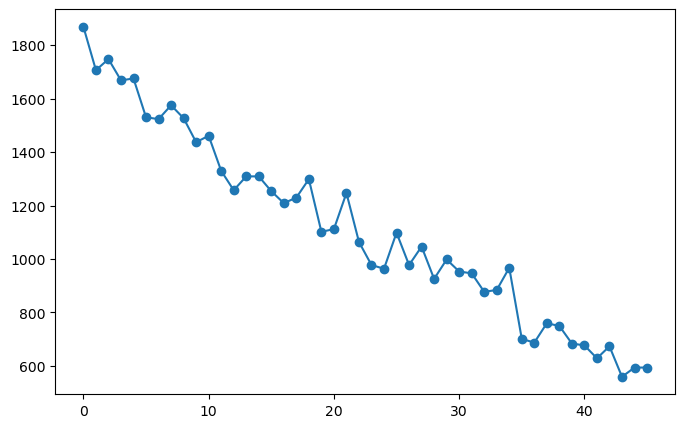

In [104]:
### plotting the loss - epoch 
commonepoch = list(range(len(commonepoch)+epochs))
commonloss= np.append(commonloss, epochloss)
plt.figure(figsize=(8,5))
plt.plot(commonepoch, commonloss, marker = 'o')

## Validation Testing

In [90]:
def validate(model, X_test, Y_test):
    correct = 0 
    tot_loss = 0
    actVSpred = np.zeros((10,10))
    crtPred = np.zeros((10))
    for i in range(len(X_test)):
        x = X_test[i]
        y = Y_test[i]

        ## -- filter or convolution 
        filtered = model[0].activate(x)
        ## -- Maxpooling
        pooled = model[1].pool(filtered)
        ## fully connected
        final = model[-1].forward(pooled)
        ## Cross Entropy 
        loss = model[-1].crossEntropyCalculator(y)
        ## Accumulated loss
        tot_loss += loss
        # Prediction = index of highest probability
        pred = np.argmax(final)
        actual = np.argmax(y)
        #print("Actual: " , actual, "Prediction: ", pred)
        if pred == actual:
            crtPred[pred]+=1
            correct+=1
            print("OK")
        else:
            actVSpred[actual, pred] +=1
            print("Not OK")
    accuracy = correct / len(X_test)
    avg_loss = tot_loss
    print ("No of total images:", len(X_test))
    print ("No of valid prediction:", correct)
    print (" Validation accuracy: ", accuracy)
    print ("Validation Loss: ", avg_loss)
    print("Active VS PRediction 10/10 :",actVSpred)
    print("Correct Prediction :", crtPred)
        

In [102]:
validate(model, valid_x, valid_y)

Actual:  0 Prediction:  0
OK
Actual:  2 Prediction:  3
Not OK
Actual:  0 Prediction:  0
OK
Actual:  6 Prediction:  7
Not OK
Actual:  8 Prediction:  8
OK
Actual:  1 Prediction:  1
OK
Actual:  9 Prediction:  9
OK
Actual:  7 Prediction:  7
OK
Actual:  2 Prediction:  6
Not OK
Actual:  4 Prediction:  4
OK
Actual:  8 Prediction:  8
OK
Actual:  5 Prediction:  5
OK
Actual:  0 Prediction:  0
OK
Actual:  7 Prediction:  4
Not OK
Actual:  4 Prediction:  6
Not OK
Actual:  0 Prediction:  0
OK
Actual:  2 Prediction:  6
Not OK
Actual:  2 Prediction:  2
OK
Actual:  9 Prediction:  9
OK
Actual:  7 Prediction:  7
OK
Actual:  0 Prediction:  0
OK
Actual:  6 Prediction:  2
Not OK
Actual:  2 Prediction:  7
Not OK
Actual:  9 Prediction:  8
Not OK
Actual:  8 Prediction:  8
OK
Actual:  9 Prediction:  9
OK
Actual:  8 Prediction:  8
OK
Actual:  2 Prediction:  2
OK
Actual:  0 Prediction:  0
OK
Actual:  9 Prediction:  8
Not OK
Actual:  5 Prediction:  5
OK
Actual:  5 Prediction:  5
OK
Actual:  3 Prediction:  6
Not OK